In [2]:
# Compare two matchms tables

In [3]:
from prediction_utils import get_galaxy_filename
import numpy as np
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [4]:
from prediction_utils import get_galaxy_filename

fres1 = get_galaxy_filename('4_matchms output formatter', '../data', None)
fres2 = get_galaxy_filename('2_matchms output formatter', '../data', None)

fref = get_galaxy_filename('KC_Confirmed', '../data', None)


# reference_lib = "../data/1_rcx_gc-orbitrap_metabolites_20210817.msp.msp"
# concs = ["all"]
# # if the predictions were generated in this galaxy session set to True
# is_fresh = False
# suffix = "" if is_fresh else ".txt"


%load_ext autoreload
%autoreload 2

In [5]:
fres1

'../data/4_matchms output formatter _get-thresholded-data_ on data 122 and data 121.tsv'

In [6]:
ref = pd.read_csv(fref)
res1 = pd.read_csv(fres1, sep="\t", index_col=0)
res2 = pd.read_csv(fres2, sep="\t", index_col=0)


In [7]:
ground = set(ref["Metabolite name"])
# orig = set(res1.reference) 
# new = set(res2.reference) 

In [8]:
ground

{'2-Methylmalonic acid_2TMS',
 'Acetylgalactosamine_4TMS',
 'Acetylgalactosamine_5TMS isomer 1',
 'Acetylgalactosamine_5TMS isomer 2',
 'Acetylglucosamine_5TMS isomer 1',
 'Allose_5TMS isomer 1',
 'Allose_5TMS isomer 2',
 'Arabitol_5TMS',
 'Arginine_3TMS',
 'Asparagine_2TMS',
 'Asparagine_3TMS',
 'Asparagine_4TMS isomer 1',
 'Asparagine_4TMS isomer 2',
 'Aspartic acid_3TMS isomer',
 'Citric acid_4TMS',
 'Creatinine_3TMS',
 'D27-Myristic acid_TMS spectra 1',
 'D4-Succinic acid_2TMS spectra 1',
 'Fructose_5TMS isomer 1',
 'Fructose_5TMS isomer 2',
 'Fumaric acid_2TMS',
 'Glucose_5TMS isomer 1',
 'Glucuro-3,6-lactone_3TMS isomer 2',
 'Glutamic acid_3TMS spectra 2',
 'Glycine_3TMS',
 'Guanine_3TMS',
 'Histidine_3TMS',
 'Histidine_4TMS',
 'Hypoxanthine_2TMS',
 'Isoleucine_2TMS',
 'Itaconic acid_2TMS',
 'Leucine_2TMS',
 'Lysine_3TMS',
 'Lysine_4TMS',
 'Malic acid_3TMS',
 'Maltotriose_11TMS isomer 1',
 'Maltotriose_11TMS isomer 2',
 'Mannitol_6TMS',
 'Mannose_5TMS isomer 1',
 'Mannose_5TMS is

In [32]:
th_m = 2
th_s = 0.1

query
C02    2-Methoxybenzoic acid_1TMS
C02      6-Aminocaproic acid_3TMS
C02             Acetyllysine_3TMS
C02             Acetyllysine_4TMS
C02                 Dopamine_4TMS
                  ...            
C59          beta-Sitosterol_1TMS
C63            Phenylalanine_2TMS
C64                Allantoin_4TMS
C64            Gluconic acid_6TMS
C68            Palmitic acid_1TMS
Name: reference, Length: 210, dtype: object

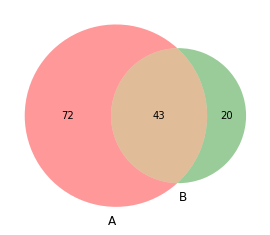

In [33]:
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
venn2((set(orig), ground))
orig

query
C001                     Citric acid_4TMS
C001                  Isocitric acid_4TMS
C002             Acetylaspartic acid_3TMS
C010             Acetylgalactosamine_4TMS
C010    Acetylgalactosamine_5TMS isomer 1
                      ...                
C378            7-Dehydrocholesterol_1TMS
C378                   Ergocalciferol_TMS
C378                      Ergosterol_1TMS
C378                    Pregnenolone_1TMS
C378                    Stigmasterol_1TMS
Name: reference, Length: 80, dtype: object

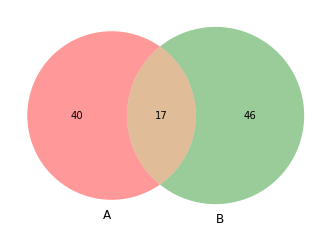

In [34]:
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference
venn2((set(new), ground))
new

In [28]:
orig = np.zeros(shape=(20, 10))
new = orig.copy()
for i, n_m in enumerate(range(1,21)):
    for j, n_s in enumerate(np.arange(0,1,0.1)):
        for res, grid in zip([res1, res2], [orig, new]):
            p = set(res[((res.matches > n_m) & (res.score > n_s))].reference)
            
            TP = len(p.intersection(ground))
            FP = len(p.difference(ground))
            FN = len(ground.difference(p))


            grid[i,j] = TP/(TP + 0.5*(FN+FP)) if (TP + 0.5*(FN+FP)) != 0 else 0
        

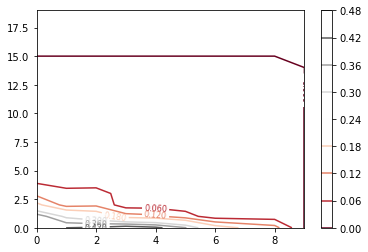

In [29]:
c = plt.contour(new, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()

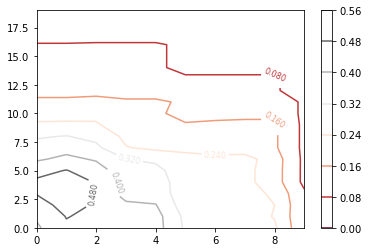

In [30]:
c = plt.contour(orig, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()


In [31]:
new.sum()

8.539975428716255

In [16]:
orig.sum()

37.630986297918795

In [17]:
th_m, th_s = 0, 0
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference


In [18]:
set(orig) -set(new)

set()

In [19]:
set(new) -set(orig)

{'Orotic acid_3TMS', 'Thymine_2TMS'}

In [20]:
set(new) - ground

{'1-Octadecanol_1TMS',
 '2,3-Dihydroxybenzoic acid_3TMS',
 '2-Deoxyglucose_4TMS',
 '2-Methoxybenzoic acid_1TMS',
 '2-Oxoadipic acid_2TMS isomer 1',
 '2-Oxoadipic acid_2TMS isomer 2',
 '3,4-Dihydroxybenzeneacetic acid_3TMS',
 '3-Chlorotyrosine_3TMS',
 '3-Indolepropionic acid',
 '3-Indolepropionic acid_1TMS',
 '3-Methylglutaric acid_2TMS',
 '4-Hydroxy-3methoxyphenylacetic acid_2TMS',
 '4-Methoxymandelic acid_2TMS',
 '5-Hydroxyindole-3-acetic acid_3TMS',
 '5-Methylcytidine_4TMS isomer 1',
 '5-Methylcytidine_4TMS isomer 2',
 '6-Aminocaproic acid_2TMS',
 '6-Aminocaproic acid_3TMS',
 '7-Dehydrocholesterol_1TMS',
 'Acetylalanine_1TMS',
 'Acetylalanine_2TMS',
 'Acetylaspartic acid_2TMS',
 'Acetylaspartic acid_3TMS',
 'Acetylglucosamine_5TMS isomer 2',
 'Acetylglutamic acid_2TMS',
 'Acetylglutamic acid_3TMS',
 'Acetylglutamine_2TMS',
 'Acetylglutamine_3TMS',
 'Acetylglutamine_4TMS',
 'Acetylleucine_1TMS',
 'Acetylleucine_2TMS',
 'Acetyllysine_3TMS',
 'Acetyllysine_4TMS',
 'Acetylmethionine_1TMS

In [21]:
set(orig) - ground

{'1-Octadecanol_1TMS',
 '2,3-Dihydroxybenzoic acid_3TMS',
 '2-Deoxyglucose_4TMS',
 '2-Methoxybenzoic acid_1TMS',
 '2-Oxoadipic acid_2TMS isomer 1',
 '2-Oxoadipic acid_2TMS isomer 2',
 '3,4-Dihydroxybenzeneacetic acid_3TMS',
 '3-Chlorotyrosine_3TMS',
 '3-Indolepropionic acid',
 '3-Indolepropionic acid_1TMS',
 '3-Methylglutaric acid_2TMS',
 '4-Hydroxy-3methoxyphenylacetic acid_2TMS',
 '4-Methoxymandelic acid_2TMS',
 '5-Hydroxyindole-3-acetic acid_3TMS',
 '5-Methylcytidine_4TMS isomer 1',
 '5-Methylcytidine_4TMS isomer 2',
 '6-Aminocaproic acid_2TMS',
 '6-Aminocaproic acid_3TMS',
 '7-Dehydrocholesterol_1TMS',
 'Acetylalanine_1TMS',
 'Acetylalanine_2TMS',
 'Acetylaspartic acid_2TMS',
 'Acetylaspartic acid_3TMS',
 'Acetylglucosamine_5TMS isomer 2',
 'Acetylglutamic acid_2TMS',
 'Acetylglutamic acid_3TMS',
 'Acetylglutamine_2TMS',
 'Acetylglutamine_3TMS',
 'Acetylglutamine_4TMS',
 'Acetylleucine_1TMS',
 'Acetylleucine_2TMS',
 'Acetyllysine_3TMS',
 'Acetyllysine_4TMS',
 'Acetylmethionine_1TMS